In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#Loading the dataset
df_train=pd.read_csv("train_s3TEQDk.csv")
df_train["source"]="train"
df_test=pd.read_csv("test_mSzZ8RL.csv")
df_test["source"]="test"
df=pd.concat([df_train,df_test],ignore_index=True)
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696.0,No,0.0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988.0,No,0.0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315.0,Yes,0.0,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454.0,No,0.0,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787.0,No,0.0,train


# 1. Checking and Cleaning Dataset :

In [ ]:
#Checking columns of dataset
df.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead', 'source'],
      dtype='object')

In [ ]:
#Checking shape 
df.shape

(372414, 12)

**Observation:**
         In our dataset,we have 351037 rows with 12 features after concatenating train and test file. 

In [ ]:
#Checking unique values 
df.nunique()

ID                     351039
Gender                      3
Age                        63
Region_Code                36
Occupation                  6
Channel_Code                5
Vintage                    67
Credit_Product              2
Avg_Account_Balance    162136
Is_Active                   2
Is_Lead                     2
source                      2
dtype: int64

In [ ]:
#Check for Null Values
df.isnull().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          44459
Avg_Account_Balance         1
Is_Active                   1
Is_Lead                105313
source                      0
dtype: int64

**Observation**:
        Null values are present in Credit _Product column.

In [ ]:
#Fill null values in Credit_Product feature
df['Credit_Product']= df['Credit_Product'].fillna("NA")

In [ ]:
#Again check for null values
df.isnull().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product              0
Avg_Account_Balance         1
Is_Active                   1
Is_Lead                105313
source                      0
dtype: int64

**Observation:**
         No null values are present except Is_Lead as it is our target variable.

In [ ]:
#Checking Datatypes and info
df.info()

ID                      object
Gender                  object
Age                      int64
Region_Code             object
Occupation              object
Channel_Code            object
Vintage                  int64
Credit_Product          object
Avg_Account_Balance    float64
Is_Active               object
Is_Lead                float64
source                  object
dtype: object

**Observation:**
         There are some categorical features that needs to be changed in numerical datatype.

In [ ]:
#Changing Yes to 1 and No to 0 in Is_Active column to covert  data into float

df["Is_Active"].replace(["Yes","No"],[1,0],inplace=True)

df['Is_Active'] = df['Is_Active'].astype(float)
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696.0,0.0,0.0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988.0,0.0,0.0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315.0,1.0,0.0,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454.0,0.0,0.0,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787.0,0.0,0.0,train


In [ ]:
#Now changing all categorical column into numerical form using label endcoding
cat_col=[ 'Gender', 'Region_Code', 'Occupation','Channel_Code', 'Credit_Product']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col:
  df[col]= le.fit_transform(df[col])


df_2= df
df_2.head()

In [ ]:
#Separating the train and test
df_train=df_2.loc[df_2["source"]=="train"]
df_test=df_2.loc[df_2["source"]=="test"]
df_1 = df_train

In [ ]:
#we can drop column as they are irrelevant and have no effect on our data
df_1.drop(columns=['ID',"source"],inplace=True)
df_1.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,19,2,2,43,1,1045696.0,0.0,0.0
1,0,30,28,3,0,32,1,581988.0,0.0,0.0
2,0,56,19,4,2,26,1,1484315.0,1.0,0.0
3,1,34,21,3,0,19,1,470454.0,0.0,0.0
4,0,30,33,3,0,33,1,886787.0,0.0,0.0


# 2. Data Visualization :

## Univariate Analysis

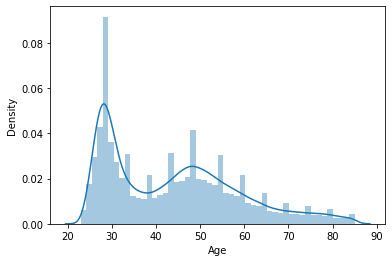

In [ ]:
sns.distplot(df['Age']);

**Observation:**
      Age distribution is slightly skewed towards left

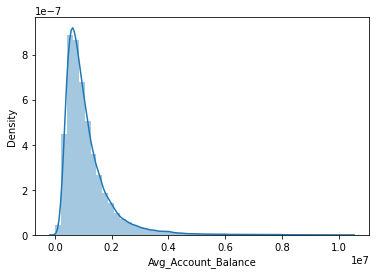

In [ ]:
sns.distplot(df['Avg_Account_Balance'])
plt.show()

**Observation:**
       Data is skewed with people having low avg. account balance

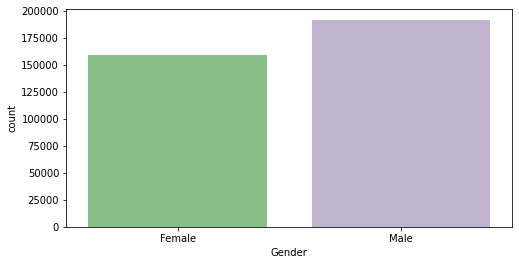

In [ ]:
#Countplot for Gender feature 
plt.figure(figsize=(8,4))
sns.countplot(df['Gender'],palette='Accent')
plt.show()

**Observation:**
       More male customers are present in the dataset. 

0.0    187437
1.0     58288
Name: Is_Lead, dtype: int64


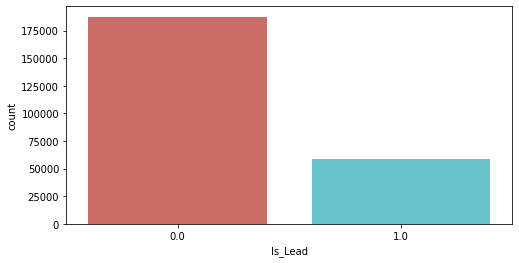

In [ ]:
#Countplot for Target variable i.e 'Is_Lead'
target = 'Is_Lead'
plt.figure(figsize=(8,4))
sns.countplot(df[target],palette='hls')
print(df[target].value_counts())

**Observation:**
         Plot shows that data is highly imbalanced and needs to be corrected before applying algorithms

## Bivariate Analysis

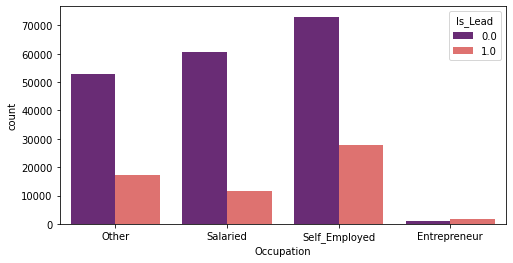

In [ ]:
#Checking occupation with customers
plt.figure(figsize=(8,4))
sns.countplot(x='Occupation',hue='Is_Lead',data=df,palette= 'magma')
plt.show()

**Observation:**
*         Self employed customers are less likely to get the credit card. Whereas entrepreneurs (though limited) are most likely to get credit card.*

<Figure size 576x288 with 0 Axes>

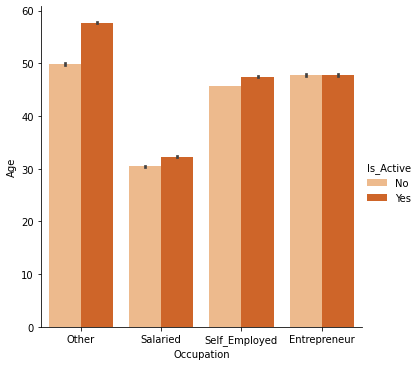

In [ ]:
#Plot showing Activness of customer in last 3 months with respect to Occupation of customer
plt.figure(figsize=(8,4))
sns.catplot(y='Age',x='Occupation',hue='Is_Active',data=df,kind='bar',palette='Oranges')
plt.show()

**Observation:**
      Active customers are more in salaried,self_employed and others as compared to entrepreneur in last 3 months.

# 3. Data Preparation :

## Resampling Data

In [ ]:
# To balance the dataset , we will apply undersampling method
from sklearn.utils import resample
# separate the minority and majority classes
df_majority = df_1[df_1['Is_Lead']==0]
df_minority = df_1[df_1['Is_Lead']==1]

print(" The majority class values are", len(df_majority))
print(" The minority class values are", len(df_minority))
print(" The ratio of both classes are", len(df_majority)/len(df_minority))

 The majority class values are 126800
 The minority class values are 63400
 The ratio of both classes are 2.0


In [ ]:
# undersample majority class
df_majority_undersampled = resample(df_majority, replace=True, n_samples=len(df_minority), random_state=0)
# combine minority class with oversampled majority class
df_undersampled = pd.concat([df_minority, df_majority_undersampled])

df_undersampled['Is_Lead'].value_counts()
df_1=df_undersampled

# display new class value counts
print(" The undersamples class values count is:", len(df_undersampled))
print(" The ratio of both classes are", len(df_undersampled[df_undersampled["Is_Lead"]==0])/len(df_undersampled[df_undersampled["Is_Lead"]==1]))


 The undersamples class values count is: 126800
 The ratio of both classes are 1.0


In [ ]:
# dropping target variable 
#assign the value of y for training and testing phase
xc = df_1.drop(columns=['Is_Lead'])
yc = df_1[["Is_Lead"]]

In [ ]:
df_1.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
6,1,62,33,2,2,20,0,1056750.0,1.0,1.0
15,1,33,19,4,1,69,0,517063.0,1.0,1.0
16,0,46,19,2,2,97,2,2282502.0,0.0,1.0
17,0,59,34,2,2,15,2,2384692.0,0.0,1.0
20,1,44,20,4,1,19,2,1001650.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
214958,0,55,34,4,2,39,2,1942193.0,1.0,0.0
122923,1,31,19,3,0,27,1,3605087.0,0.0,0.0
2501,1,25,5,3,0,19,1,1688792.0,1.0,0.0
153116,0,46,19,4,1,49,2,1492449.0,1.0,0.0


In [ ]:
#Standardizing value of x by using standardscaler to make the data normally distributed
sc = StandardScaler()
df_xc = pd.DataFrame(sc.fit_transform(xc),columns=xc.columns)

#4. Classification Modelling :

In [ ]:
#Importing necessary libraries
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

#Import warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#defining a function to find fit of the model

def max_accuracy_scr(names,model_c,df_xc,yc):
    accuracy_scr_max = 0
    roc_scr_max=0
    train_xc,test_xc,train_yc,test_yc = train_test_split(df_xc,yc,random_state = 42,test_size = 0.2,stratify = yc)
    model_c.fit(train_xc,train_yc)
    pred = model_c.predict_proba(test_xc)[:, 1]
    roc_score = roc_auc_score(test_yc, pred)
    accuracy_scr = accuracy_score(test_yc,model_c.predict(test_xc))
    if roc_score> roc_scr_max:
      roc_scr_max=roc_score
      final_model = model_c
      mean_acc = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").mean()
      std_dev = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").std()
      cross_val = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy")
    print("*"*50)
    print("Results for model : ",names,'\n',
          "max roc score correspond to random state " ,roc_scr_max ,'\n',
          "Mean accuracy score is : ",mean_acc,'\n',
          "Std deviation score is : ",std_dev,'\n',
          "Cross validation scores are :  " ,cross_val) 
    print(f"roc_auc_score: {roc_score}")
    print("*"*50)

In [ ]:
#Now by using multiple Algorithms we are calculating the best Algo which performs best for our data set 
accuracy_scr_max = []
models=[]
#accuracy=[]
std_dev=[]
roc_auc=[]
mean_acc=[]
cross_val=[]
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
models.append(("GausianNB",GaussianNB()))

for names,model_c in models:
    max_accuracy_scr(names,model_c,df_xc,yc)



**************************************************
Results for model :  Logistic Regression 
 max roc score correspond to random state  0.7288273374448945 
 Mean accuracy score is :  0.717907465825447 
 Std deviation score is :  0.0007424985675671879 
 Cross validation scores are :   [0.71869085 0.71779706 0.71829653 0.71653523 0.71821767]
roc_auc_score: 0.7288273374448945
**************************************************
**************************************************
Results for model :  Random Forest 
 max roc score correspond to random state  0.9103159223273194 
 Mean accuracy score is :  0.8655573080967403 
 Std deviation score is :  0.022151429391755687 
 Cross validation scores are :   [0.89014196 0.85312829 0.84700315 0.84508412 0.89374343]
roc_auc_score: 0.9103159223273194
**************************************************
**************************************************
Results for model :  Decision Tree Classifier 
 max roc score correspond to random state  0.785843848

**Observation:**
From initial model values RandomForest is performing better than others.

## First Attempt:Random Forest Classifier

In [ ]:
# Estimating best n_estimator using grid search for Randomforest Classifier
parameters={"n_estimators":[1,10,100]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_xc,yc)
print("Best parameter : ",clf.best_params_,"\nBest Estimator : ", clf.best_estimator_,"\nBest Score : ", clf.best_score_)

Best parameter :  {'n_estimators': 100} 
Best Estimator :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 
Best Score :  0.913380565596732


In [ ]:
#Again running RFC with n_estimator = 100
rf_clf=RandomForestClassifier(n_estimators=100,random_state=42)
max_accuracy_scr("RandomForest Classifier",rf_clf,df_xc,yc)

**************************************************
Results for model :  RandomForest Classifier 
 max roc score correspond to random state  0.9105082179392769 
 Mean accuracy score is :  0.8657150368033648 
 Std deviation score is :  0.02180289261334414 
 Cross validation scores are :   [0.8893796  0.85207676 0.84610936 0.84600421 0.89500526]
roc_auc_score: 0.9105082179392769
**************************************************


In [ ]:
xc_train,xc_test,yc_train,yc_test=train_test_split(df_xc, yc,random_state = 80,test_size=0.20,stratify=yc)
rf_clf.fit(xc_train,yc_train)
yc_pred=rf_clf.predict(xc_test)

 ROC_AUC score is  0.9123239406178785
accuracy score is :  0.8646950578338591
Precision is :  0.846217483224561
Recall is:  0.72602523659306
F1 Score is :  0.7815272295088925
classification report 
               precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     25360
         1.0       0.85      0.73      0.78     12680

    accuracy                           0.86     38040
   macro avg       0.86      0.83      0.84     38040
weighted avg       0.86      0.86      0.86     38040



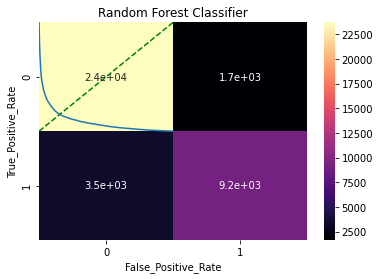

In [ ]:
#  Random Forest Classifier Results

pred_pb=rf_clf.predict_proba(xc_test)[:,1]
Fpr,Tpr,thresholds = roc_curve(yc_test,pred_pb,pos_label=True)
auc = roc_auc_score(yc_test,pred_pb)

print(" ROC_AUC score is ",auc)
print("accuracy score is : ",accuracy_score(yc_test,yc_pred))
print("Precision is : " ,precision_score(yc_test, yc_pred))
print("Recall is: " ,recall_score(yc_test, yc_pred))
print("F1 Score is : " ,f1_score(yc_test, yc_pred))
print("classification report \n",classification_report(yc_test,yc_pred))

#Plotting confusion matrix
cnf = confusion_matrix(yc_test,yc_pred)
sns.heatmap(cnf, annot=True, cmap = "magma")

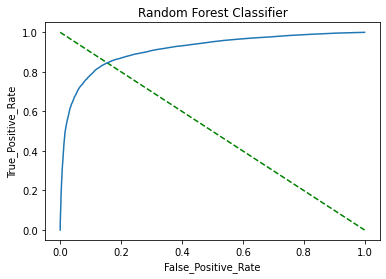

In [ ]:
#plotting the graph for area under curve for representing accuracy of data
plt.plot([0,1],[1,0],'g--')
plt.plot(Fpr,Tpr)
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title("Random Forest Classifier")
plt.show()

### Observation - Random Forest Model



*   Taken output variable as Is_Lead(transformed into probablistic value between 1 and 0)
*    base model selected is Random Forest (selected on basis of aoc_roc score) which provides max ROC score of 0.91

* Plotted AOC/ROC line that shows good match between test and predicted values.

* Also plotted confusion matrix, Overall model fit is good. 
* However, as the predicted probability was meaned in RF model upto 2 decimal places the resultant AUC score with test data was found to be ~ 0.85

## Second Attempt: XG Boost Classifer

*To boost the accuracy and roc_auc score . I attempted to use XG Boost Classifier as it is inherently well suited for imbalance classification problems*

In [ ]:
#Trying XGBoost
import xgboost as xg
from xgboost import XGBClassifier
from sklearn.utils import class_weight

clf2 = xg.XGBClassifier(class_weight='balanced').fit(xc_train, yc_train)
class_weight.compute_class_weight('balanced', np.unique(yc_train), yc_train["Is_Lead"])
xg_pred = clf2.predict(xc_test)


 ROC_AUC score is  0.8740769527634864
accuracy score is :  0.8298107255520505
Precision is :  0.793289224952741
Recall is:  0.6619085173501578
F1 Score is :  0.7216680997420464
classification report 
               precision    recall  f1-score   support

         0.0       0.84      0.91      0.88     25360
         1.0       0.79      0.66      0.72     12680

    accuracy                           0.83     38040
   macro avg       0.82      0.79      0.80     38040
weighted avg       0.83      0.83      0.83     38040



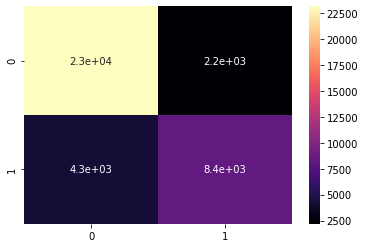

In [ ]:
#XG Boost Results
xg_pred_2=clf2.predict_proba(xc_test)[:,1]
Fpr,Tpr,thresholds = roc_curve(yc_test,xg_pred_2,pos_label=True)
auc = roc_auc_score(yc_test,xg_pred_2)

print(" ROC_AUC score is ",auc)
print("accuracy score is : ",accuracy_score(yc_test,xg_pred))
print("Precision is : " ,precision_score(yc_test, xg_pred))
print("Recall is: " ,recall_score(yc_test, xg_pred))
print("F1 Score is : " ,f1_score(yc_test, xg_pred))
print("classification report \n",classification_report(yc_test,xg_pred))

cnf = confusion_matrix(yc_test,xg_pred)
sns.heatmap(cnf, annot=True, cmap = "magma")

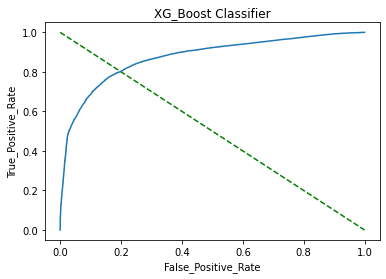

In [ ]:
#plotting the graph for area under curve for representing accuracy of data
plt.plot([0,1],[1,0],'g--')
plt.plot(Fpr,Tpr)
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title("XG_Boost Classifier")
plt.show()

### Observation - XG Boost Model



*   Taken output variable as Is_Lead(transformed into probablistic value between 1 and 0)
*    base model selected is XG Boost Classifer selected to boost accuracy in imbalanced class classification program.

* Plotted AOC/ROC line that shows good match between test and predicted values.

* Max ROC score is 0.87, Overall model fit is good. 

* However, XG boost auc score with test data dropped to ~ 0.86 due to overfitting issues.

## Third Attempt: LGBM Model with Stratification Folds

*To avoid the issue of overfitting in dataset. I decided to implement stratification folds and also use LGB model for finding classification based probabilities.*

In [ ]:
#Trying stratification modeling
from sklearn.model_selection import KFold, StratifiedKFold

def cross_val(xc, yc, model, params, folds=10):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    for fold, (train_idx, test_idx) in enumerate(skf.split(xc, yc)):
        print(f"Fold: {fold}")
        xc_train, yc_train = xc.iloc[train_idx], yc.iloc[train_idx]
        xc_test, yc_test = xc.iloc[test_idx], yc.iloc[test_idx]

        model_c= model(**params)
        model_c.fit(xc_train, yc_train,eval_set=[(xc_test, yc_test)],early_stopping_rounds=100, verbose=300)

        pred_y = model_c.predict_proba(xc_test)[:, 1]
        roc_score = roc_auc_score(yc_test, pred_y)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    
    return model_c

In [ ]:
#Applying LGBM Model with 10 stratified cross-folds
from lightgbm import LGBMClassifier

lgb_params= {'learning_rate': 0.045, 'n_estimators': 10000,'max_bin': 84,'num_leaves': 10,'max_depth': 20,'reg_alpha': 8.457,'reg_lambda': 6.853,'subsample': 0.749}
lgb_model = cross_val(xc, yc, LGBMClassifier, lgb_params)

Fold: 0
Training until validation scores don't improve for 100 rounds.
[300]	valid_0's binary_logloss: 0.395374
[600]	valid_0's binary_logloss: 0.394525
[900]	valid_0's binary_logloss: 0.394131
[1200]	valid_0's binary_logloss: 0.393572
[1500]	valid_0's binary_logloss: 0.393323
[1800]	valid_0's binary_logloss: 0.393151
[2100]	valid_0's binary_logloss: 0.392978
[2400]	valid_0's binary_logloss: 0.392749
Early stopping, best iteration is:
[2561]	valid_0's binary_logloss: 0.392694
roc_auc_score: 0.8759501537481714
--------------------------------------------------
Fold: 1
Training until validation scores don't improve for 100 rounds.
[300]	valid_0's binary_logloss: 0.394509
[600]	valid_0's binary_logloss: 0.393751
[900]	valid_0's binary_logloss: 0.393328
[1200]	valid_0's binary_logloss: 0.393054
[1500]	valid_0's binary_logloss: 0.392698
[1800]	valid_0's binary_logloss: 0.392535
[2100]	valid_0's binary_logloss: 0.392387
[2400]	valid_0's binary_logloss: 0.392143
[2700]	valid_0's binary_loglos

 ROC_AUC score is  0.8740769527634864
accuracy score is :  0.8318349106203996
Precision is :  0.7919338351454326
Recall is:  0.6720820189274448
F1 Score is :  0.7271020860884775
classification report 
               precision    recall  f1-score   support

         0.0       0.85      0.91      0.88     25360
         1.0       0.79      0.67      0.73     12680

    accuracy                           0.83     38040
   macro avg       0.82      0.79      0.80     38040
weighted avg       0.83      0.83      0.83     38040



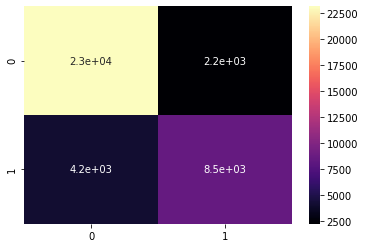

In [ ]:
#LGBM results
lgb_pred_2=clf2.predict_proba(xc_test)[:,1]
Fpr,Tpr,thresholds = roc_curve(yc_test,lgb_pred_2,pos_label=True)
auc = roc_auc_score(yc_test,lgb_pred_2)

print(" ROC_AUC score is ",auc)
lgb_model.fit(xc_train,yc_train)
lgb_pred=lgb_model.predict(xc_test)
print("accuracy score is : ",accuracy_score(yc_test,lgb_pred))
print("Precision is : " ,precision_score(yc_test, lgb_pred))
print("Recall is: " ,recall_score(yc_test, lgb_pred))
print("F1 Score is : " ,f1_score(yc_test, lgb_pred))
print("classification report \n",classification_report(yc_test,lgb_pred))

cnf = confusion_matrix(yc_test,lgb_pred)
sns.heatmap(cnf, annot=True, cmap = "magma")

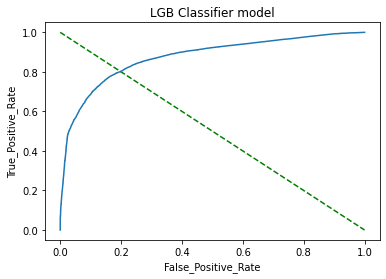

In [ ]:
#plotting the graph for area under curve for representing accuracy of data
plt.plot([0,1],[1,0],'g--')
plt.plot(Fpr,Tpr)
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title("LGB Classifier model")
plt.show()

### Observation - LGBM Classifier with cross-validation



*   Taken output variable as Is_Lead(transformed into probablistic value between 1 and 0)
*    base model selected is LGBM classifier model along with stratified cross-validation of 10 folds .
*  This was done to remove any overfitting issues in the model. 

* Plotted AOC/ROC line that shows good match between test and predicted values.

* Max ROC score is 0.874

# 5. Prediction

## Preparing Dataset for prediction

In [ ]:
#we can drop column as they are irrelevant and have no effect on our data
df_3 = df_test


In [ ]:
df_3.drop(columns=["source"],inplace=True)
df_3.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
267102,VBENBARO,1,29,5,2,0,25,2,742366.0,0.0,NaN
267103,CCMEWNKY,1,43,19,2,1,49,0,925537.0,0.0,NaN
267104,VK3KGA9M,1,31,21,3,0,14,1,215949.0,0.0,NaN
267105,TT8RPZVC,1,29,23,2,0,33,1,868070.0,0.0,NaN
267106,SHQZEYTZ,0,29,21,2,0,19,1,657087.0,0.0,NaN


In [ ]:
# dropping target variable 
#assign the value of y for training and testing phase
xc_pred = df_3.drop(columns=['Is_Lead',"ID"])

#Standardizing value of x by using standardscaler to make the data normally distributed
sc = StandardScaler()
df_xc_pred = pd.DataFrame(sc.fit_transform(xc_pred),columns=xc_pred.columns)

In [ ]:
lead_pred_xg=clf2.predict_proba(df_xc_pred)[:,1]
lead_pred_lgb=lgb_model.predict_proba(df_xc_pred)[:,1]
lead_pred_rf=rf_clf.predict_proba(df_xc_pred)[:,1]
print(lead_pred_xg, lead_pred_lgb, lead_pred_rf)

[0.0894194  0.8986605  0.0877608  ... 0.13629796 0.32178897 0.0790946 ] [0.0804745  0.87315406 0.0811676  ... 0.10317732 0.29637089 0.10768579] [0.01 0.97 0.01 ... 0.09 0.3  0.05]


In [ ]:
#Dataframe for lead prediction
lead_pred_lgb= pd.DataFrame(lead_pred_lgb,columns=["Is_Lead"])
lead_pred_xg= pd.DataFrame(lead_pred_xg,columns=["Is_Lead"])
lead_pred_rf= pd.DataFrame(lead_pred_rf,columns=["Is_Lead"])

In [ ]:
df_test = df_test.reset_index()
df_test.head()

In [ ]:
#Saving ID  and prediction to csv file for XG Model
df_pred_xg=pd.concat([df_test["ID"],lead_pred_xg],axis=1,ignore_index=True)
df_pred_xg.columns = ["ID","Is_Lead"]
print(df_pred_xg.head())
df_pred_xg.to_csv("Credit_Card_Lead_Predictions_final_xg.csv",index=False)

#Saving ID  and prediction to csv file for LGB Model
df_pred_lgb=pd.concat([df_test["ID"],lead_pred_lgb],axis=1,ignore_index=True)
df_pred_lgb.columns = ["ID","Is_Lead"]
print(df_pred_lgb.head())
df_pred_lgb.to_csv("Credit_Card_Lead_Predictions_final_lgb.csv",index=False)

#Saving ID  and prediction to csv file for RF model
df_pred_rf=pd.concat([df_test["ID"],lead_pred_rf],axis=1,ignore_index=True)
df_pred_rf.columns = ["ID","Is_Lead"]
print(df_pred_rf.head())
df_pred_rf.to_csv("Credit_Card_Lead_Predictions_final_rf.csv",index=False)

         ID   Is_Lead
0  VBENBARO  0.089419
1  CCMEWNKY  0.898660
2  VK3KGA9M  0.087761
3  TT8RPZVC  0.039810
4  SHQZEYTZ  0.040369
         ID   Is_Lead
0  VBENBARO  0.080474
1  CCMEWNKY  0.873154
2  VK3KGA9M  0.081168
3  TT8RPZVC  0.033926
4  SHQZEYTZ  0.034605
         ID  Is_Lead
0  VBENBARO     0.01
1  CCMEWNKY     0.97
2  VK3KGA9M     0.01
3  TT8RPZVC     0.11
4  SHQZEYTZ     0.00


#6. Overall Remarks :
*   Data contained both categorical and numerical data. Converted categories to numerical for EDA analysis.
* Also conducted visual analysis to observe following:
 1. IndentActive customers are more in salaried,self_employed and others as compared to entrepreneur in last 3 months.
 2. Data is skewed towards left in Avg_Account_Balance
 3. Target Variable is imbalanced and needed to be corrected for proper modelling. 

* Dataset was balanced by using undersampling technique.

* Random Forest Classifier:
  1.  Found RandomForest model had the highest AUC score(0.91) among various base models. 
  2. However, as the predicted probability was meaned in RF model upto 2 decimal places the resultant AUC score with test data was found to be ~ 0.85
* XG Boost Classifier:
  1. To further boost the accuracy XG Boost method was used and AUC score of 0.87 was found with the training data.
  2. However, XG boost auc score with test data dropped to ~ 0.86 due to overfitting issues. 

* LGBM Classifier with stratified cross-validation:
  1. To solve overfitting issues, LGBM model with 10-fold cross-validation was used and AUC score 0.874 with training data.
  2. Model performed very well with test data and provided auc score of ~0.871

* Hence, final model is selected as LGBM model as it is most consistent model with highest AUC score.  





# Saving the model :

In [ ]:
import joblib
#save the model as a pickle in a file 
joblib.dump(lgb_model,'lgb_model.pkl')

['lgb_model.pkl']